In [105]:
from sklearn import datasets
import math
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection 
import sklearn
import seaborn as sns
%matplotlib inline

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


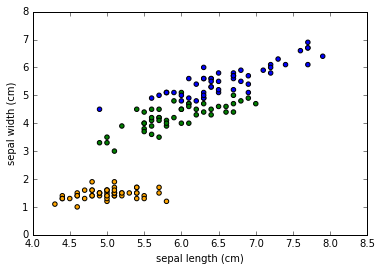

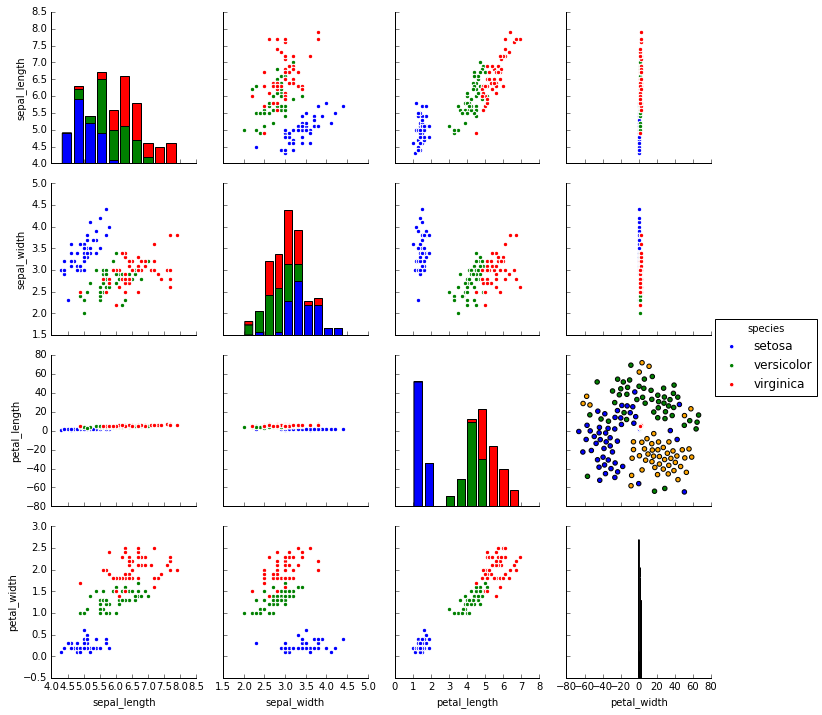

In [120]:

iris = datasets.load_iris()
print(iris.feature_names)
# plot 2 dim 
plt.scatter(* iris.data[:, [0, 2]].T, c=[['orange', 'green', 'blue'][x] for x in iris.target])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# Plot 散布図行列
sns.pairplot(sns.load_dataset("iris"), hue="species", size=2.5)
from sklearn.manifold import TSNE
# tsne で二次元可視化
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(iris.data)
plt.scatter(*X_reduced.T, c=[['orange', 'green', 'blue'][x] for x in iris.target])

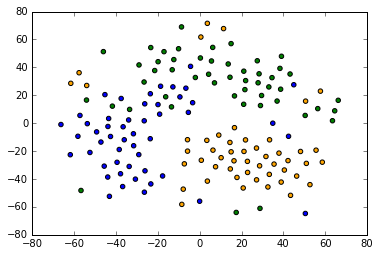

In [114]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


dataset = datasets.load_iris()

features = dataset.data
targets = dataset.target

# Petal length と Petal width だけを特徴量として使う
petal_features = features[:, 2:]

# モデルを学習させる
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(petal_features, targets)
accuracy = rfc.score(test_x, test_y)
print('RandomForestClassifier accuracy {0:.2%}'.format(accuracy))
print('Feature Importances:')
for i, feat in enumerate(iris['feature_names']):
    print('\t{0:20s} : {1:>.6f}'.format(feat, rfc.feature_importances_  [i]))
# DOT 言語のフォーマットで決定木の形を出力する
# 見るためにはGraphviz (https://www.graphviz.org/)などが必要
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz(clf, out_file=f)

RandomForestClassifier accuracy 95.56%
Feature Importances:
	sepal length (cm)    : 0.131366
	sepal width (cm)     : 0.034344
	petal length (cm)    : 0.335046
	petal width (cm)     : 0.499244


In [115]:
#from sklearn import svm
#svm = svm.LinearSVC()
#svm.fit(iris.data, iris.target)
rfc = RandomForestClassifier(max_depth=2, random_state=0)
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(iris.data, iris.target, test_size=0.3)
rfc.fit(train_x, train_y)

accuracy = rfc.score(test_x, test_y)
print('RandomForestClassifier accuracy {0:.2%}'.format(accuracy))
print('Feature Importances:')
for i, feat in enumerate(iris['feature_names']):
    print('\t{0:20s} : {1:>.6f}'.format(feat, rfc.feature_importances_  [i]))

RandomForestClassifier accuracy 97.78%
Feature Importances:
	sepal length (cm)    : 0.159952
	sepal width (cm)     : 0.006237
	petal length (cm)    : 0.326595
	petal width (cm)     : 0.507216


In [95]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf_xgb = GradientBoostingClassifier(max_depth = 5,
                        learning_rate=0.1,
                        n_estimators=100)
clf_xgb.fit(train_x, train_y)
accu = clf_xgb.score(test_x, test_y)
print('accuracy = {:>.4f}'.format(accu))

# Feature Importance
fti = clf_xgb.feature_importances_   

print('Feature Importances:')
for i, feat in enumerate(iris['feature_names']):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

accuracy = 0.9556
Feature Importances:
	sepal length (cm)    : 0.005404
	sepal width (cm)     : 0.015937
	petal length (cm)    : 0.388424
	petal width (cm)     : 0.163569


In [16]:
data=datasets.load_breast_cancer()
#data=datasets.load_iris()
N=len(data.data)
N_test=int(len(data.data)*0.2)
N_train=N-N_test
x_train=data.data[:N_train]
y_train=data.target[:N_train]
x_test=data.data[N_train:]
y_test=data.target[N_train:]


In [67]:
# シミュレーションデータ
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Make samples
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, \
                           n_redundant=0, shuffle=True,n_classes=4,n_clusters_per_class=1)
N=len(X)
N_test=int(len(X)*0.2)
N_train=N-N_test
x_train=X[:N_train]
y_train=y[:N_train]
x_test=X[N_train:]
y_test=y[N_train:]
#clf = RandomForestClassifier(max_depth=2, random_state=0)
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

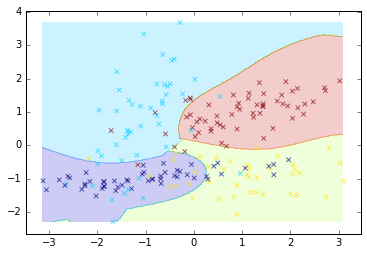

In [68]:
# visualizing
resolution = 0.02
X=x_test
y=y_test
xx1,xx2 = np.meshgrid(np.arange(min(X[:,0]),max(X[:,0]),resolution),np.arange(min(X[:,1]),max(X[:,1]),resolution))
Z=clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z=Z.reshape(xx1.shape)
plt.contourf(xx1,xx2,Z,alpha=0.2)
plt.scatter(X[:,0], X[:,1],c=y,marker='x',alpha=0.6)
plt.show()

In [110]:
xx1.shape

(298, 347)